In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset_India Shelter Finance.csv")

In [5]:
print(df.head())

             id  conversation_id               created_at        date  \
0  1.568090e+18     1.568040e+18  2022-09-09 04:00:52 UTC  09-09-2022   
1  1.568090e+18     1.568090e+18  2022-09-09 04:00:52 UTC  09-09-2022   
2  1.568090e+18     1.568090e+18  2022-09-09 04:00:51 UTC  09-09-2022   
3  1.568090e+18     1.568090e+18  2022-09-09 04:00:51 UTC  09-09-2022   
4  1.568090e+18     1.568090e+18  2022-09-09 04:00:51 UTC  09-09-2022   

       time  timezone       user_id         username  \
0  04:00:52         0  1.548680e+18   jasonkhumaloii   
1  04:00:52         0  1.142880e+18    therhancock19   
2  04:00:51         0  1.546220e+18      lucky694321   
3  04:00:51         0  1.515710e+18    djdanstarbwoy   
4  04:00:51         0  1.435260e+18  yournewsobsess1   

                                        name place  ... geo source user_rt_id  \
0                                     DonOne   NaN  ... NaN    NaN        NaN   
1                                Itâ€™s Ryne   NaN  ... NaN   

In [7]:
print(df.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [23]:
#Question No. 1
most_retweeted = df.loc[df['retweets_count'].idxmax(), 'username']
print(f"User with the most retweeted tweet: {most_retweeted}")

User with the most retweeted tweet: ycsm1n


In [11]:
#Question No. 2 
df['effectiveness'] = df['retweets_count'] / (df.index + 1)  
most_effective_tweet = df.loc[df['effectiveness'].idxmax(), 'tweet']
print(f"Most effective tweet: {most_effective_tweet}")

Most effective tweet: fun royal family fact: queen elizabeth had two severely disabled first cousins who were publicly pronounced dead in 1940 and 1961 respectively, but they both actually lived in a care home with no visits or support from the royal family until their actual deaths in 1986 and 2014


C:\Users\ADITYA KUSHWAHA\AppData\Local\Temp\ipykernel_13316\2023698347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')


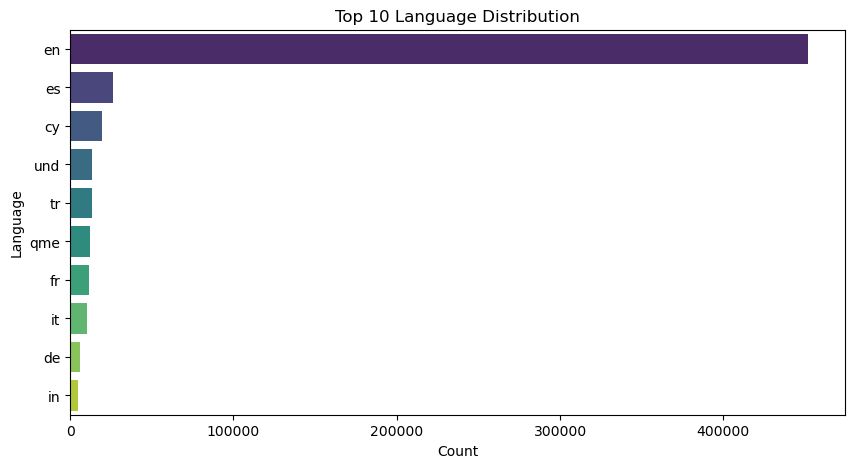

In [13]:
#Question No. 3 (A)
top_languages = df['language'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Top 10 Language Distribution')
plt.show()

C:\Users\ADITYA KUSHWAHA\AppData\Local\Temp\ipykernel_13316\1466128867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_places.values, y=top_places.index, palette='coolwarm')


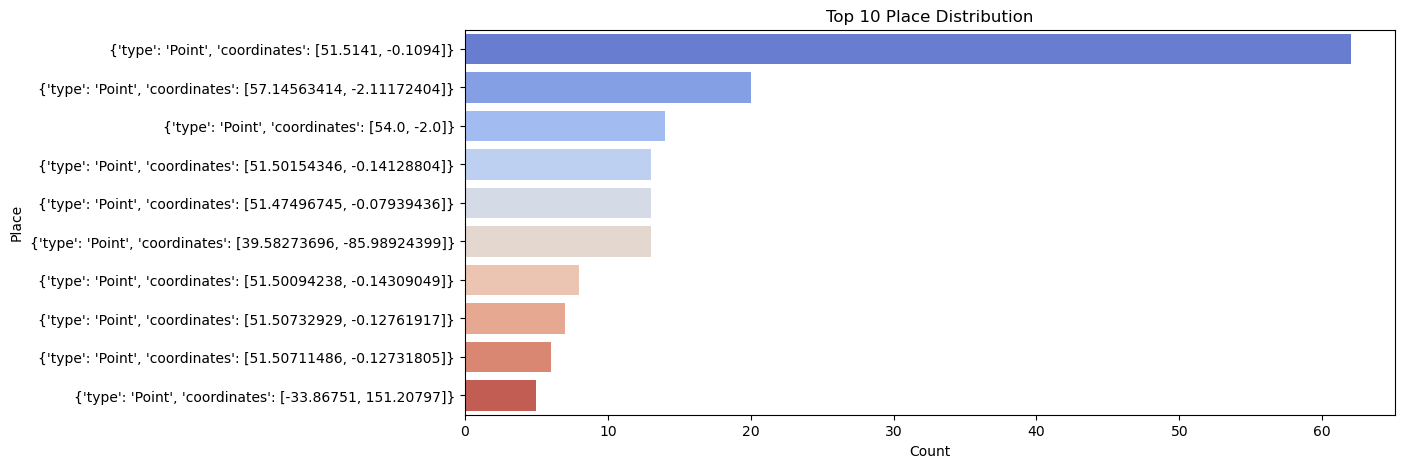

In [15]:
#Question No. 3(B)
df_place_cleaned = df.dropna(subset=['place'])
top_places = df_place_cleaned['place'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_places.values, y=top_places.index, palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Place')
plt.title('Top 10 Place Distribution')
plt.show()

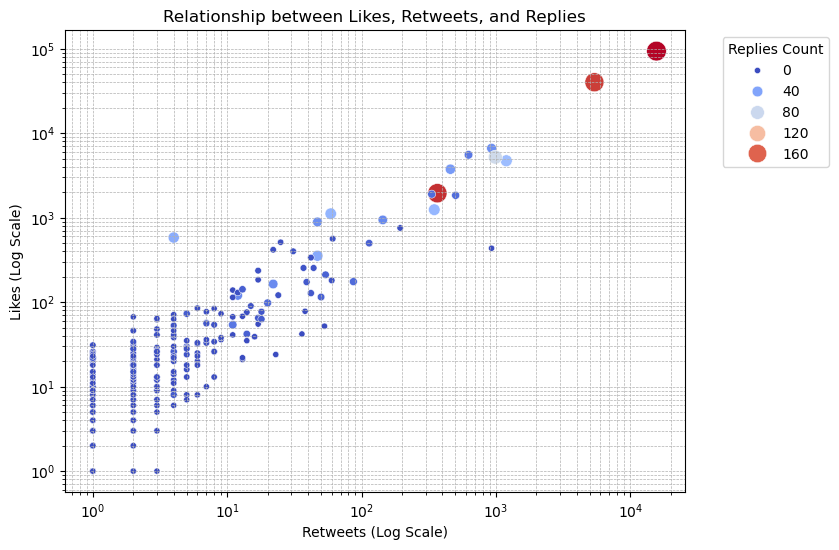

In [17]:
#Question No. 4
df_sample = df[['retweets_count', 'likes_count', 'replies_count']].dropna().sample(n=2000, random_state=42)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sample, x='retweets_count', y='likes_count', hue='replies_count', size='replies_count', sizes=(20, 200), palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Retweets (Log Scale)')
plt.ylabel('Likes (Log Scale)')
plt.title('Relationship between Likes, Retweets, and Replies')
plt.legend(title="Replies Count", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [21]:
#Question No.5
likes_with_video = df[df['video'] > 0]['likes_count'].mean()
likes_without_video = df[df['video'] == 0]['likes_count'].mean()

print(f"Average likes for tweets with video: {likes_with_video}")
print(f"Average likes for tweets without video: {likes_without_video}")

if likes_with_video > likes_without_video:
    print("Tweets with videos are more likeable.")
else:
    print("Tweets without videos receive more likes.")

Average likes for tweets with video: 46.63969851456837
Average likes for tweets without video: 17.033230091610267
Tweets with videos are more likeable.
